<a href="https://colab.research.google.com/github/Rhikshitha/MNIST-Digit-Classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
#dl libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow._api.v2.math import confusion_matrix

In [ ]:
#Loading mnist data from keras.dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy array
print (X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)  

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60000 images
Test data=10000
Each image dimension is 28x28
Grayscale image-Only one color channel

In [ ]:
#printing any one image from the training dataset
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

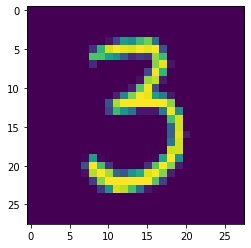

3


In [ ]:
#numpy array to image conversion
plt.imshow(X_train[50])
plt.show()
#printing the corresponding label
print(Y_train[50])

In [ ]:
print(X_train[10].shape) #shape of the image(All the images have the same dimension in this dataset so no need to resize. If not we need to resize all the images to a common dimension)

(28, 28)


In [ ]:
#unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test(labels)  
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Normalization (Scaling the values)
X_train=X_train/255
X_test=X_test/255

In [ ]:
#After normalisation,printing any one image from the training dataset
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [ ]:
#setting up the layers of neural netowrk
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#flattening the array input to 1d array
    keras.layers.Dense(50,activation='relu',),#50-number of neurons
    keras.layers.Dense(50,activation='relu',),
    keras.layers.Dense(10,activation='sigmoid')#The number of classes in your label(0-9, in this case) is 10, so 10 neurons in the output lyaer
])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",#loss function
              metrics=['accuracy']) 

In [ ]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)#epochs-how many times nn should go thru the data

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

In [ ]:
#loss function - distance between true value and treated value, the less the loss function value the more the accuracy

In [ ]:
#Training data accuracy is 98.88%
#Accuracy on data set is .. 
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9710
0.9710000157356262


In [ ]:
#Test data accuracy is 97.4%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


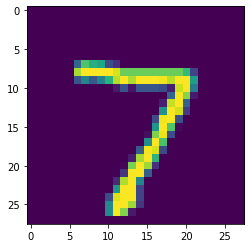

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
#print the true value(label)
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)#gives the prediction prob for each class at that data point 

In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])#10 values so in the above op. each represents the prob for each label for eg, prob of 0 for this iamge is 2.80 e-03

[3.5130084e-03 6.7106444e-01 6.6638464e-01 8.5868883e-01 6.2501094e-05
 9.0813637e-04 4.0907306e-08 9.9999774e-01 1.3417095e-02 6.5949798e-02]


In [ ]:
#Conversion of prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
print(Y_pred)

[[3.5130084e-03 6.7106444e-01 6.6638464e-01 ... 9.9999774e-01
  1.3417095e-02 6.5949798e-02]
 [1.4623702e-03 9.8551810e-01 9.9999803e-01 ... 8.7179070e-10
  9.9594283e-01 2.8698874e-09]
 [3.2803416e-04 9.9889880e-01 1.9822419e-02 ... 1.7416507e-02
  8.2349467e-01 3.1207800e-03]
 ...
 [7.6076623e-07 2.1074546e-05 1.1165320e-04 ... 5.3507298e-02
  2.6697814e-03 5.0617886e-01]
 [3.9582705e-05 3.1402707e-04 3.5408437e-03 ... 6.9005787e-03
  9.9133873e-01 6.4516068e-04]
 [1.0095924e-02 1.2965620e-02 4.6259880e-02 ... 3.3845839e-07
  1.4659762e-04 5.2905436e-10]]


Y_test - true labels

Y_pred_labels-predicated labels by nn model

In [ ]:
#Conversion of prediction probabilities to class label for all test data points
Y_pred_labels= [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
#confusion_matrix(for heatmap)
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

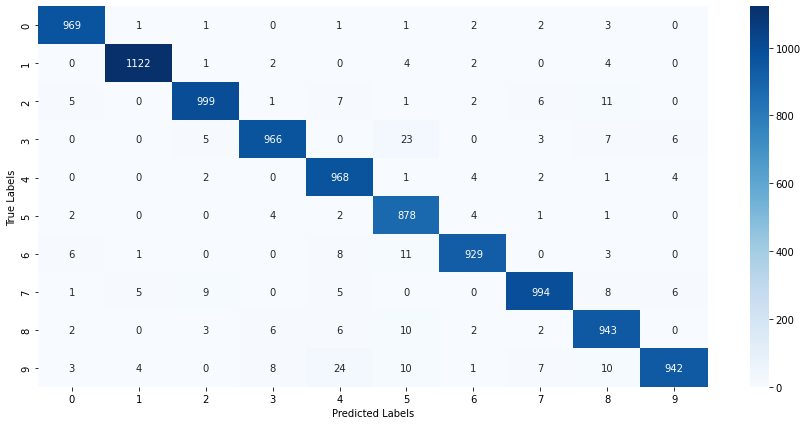

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot= True,fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
#Inference from the plot:True label is 0 but model predicted 1 image as 1. 1 as 2 , 0 as 3 and so on.Diagonal represents the correct predictions. rest all wrong

In [ ]:
#Buiding a predictive system
input_image_path = '/content/three.png'
#converting the image to numpy array and dimension 
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[11 11 11]
  [34 34 34]
  [34 34 34]
  ...
  [34 34 34]
  [34 34 34]
  [22 22 22]]]


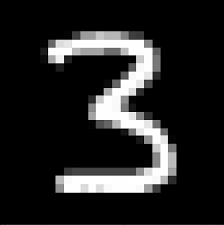

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(225, 224, 3)

In [ ]:
#since the third parameter is 3 it is rgb, so weve to convert to grayscale image and resize it to 28x28
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape


(225, 224)

In [ ]:
input_image_resize= cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255 

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28]) #1 repesrents were telling the nn that only one image is provided as input

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

[[5.4798601e-09 1.1268467e-02 5.9826553e-02 1.0000000e+00 3.5828352e-03
  6.3203675e-01 2.3508231e-10 7.3787270e-09 9.9132609e-01 6.1383545e-03]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


Enter the image of the digit to be predicted/content/RdEpj.png


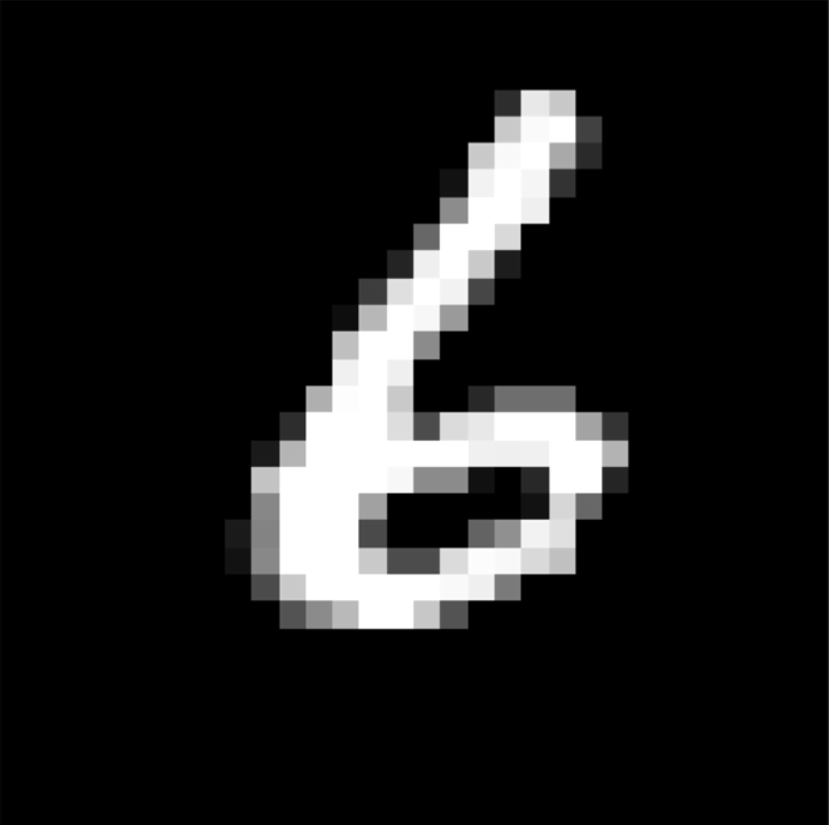

6


In [ ]:
#"Predictive system"
input_image_path = input("Enter the image of the digit to be predicted") 
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize= cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255 
image_reshaped=np.reshape(input_image_resize,[1,28,28]) 
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)